In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
from keras.datasets import fashion_mnist#download mnist data and split into train and test sets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout#create model


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Using TensorFlow backend.


In [2]:

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=10000, random_state=42)

4423680/4422102 [==============================] - 1s 0us/step


In [3]:
###Seeing dimensions of the different sets
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 28, 28)
(50000,)
(10000, 28, 28)
(10000,)
(10000, 28, 28)
(10000,)


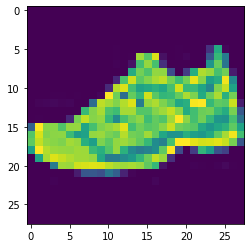

In [4]:
##Seeing example of random images
image_no=5
img=X_train[image_no]
plt.imshow(img)

In [5]:
def normalize_X(X):
    X_norm=X/255
    return X_norm

In [6]:
def reshape_X(X):
    X_reshaped=X.reshape(X.shape[0],28,28,1)
    return X_reshaped

In [7]:
def input_and_run(model,X_train,X_val,X_test,y_train,y_val,y_test,alpha=0.01,num_epochs=10):
    #Pre processing the data
    X_train=reshape_X(normalize_X(X_train))
    X_val=reshape_X(normalize_X(X_val))
    X_test=reshape_X(normalize_X(X_test))
    y_train=to_categorical(y_train)
    y_val=to_categorical(y_val)
    y_test=to_categorical(y_test)
    
    #compile model using accuracy to measure model performance
    opt = keras.optimizers.Adam(learning_rate=alpha)
    model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
    
    #train the model
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=num_epochs)
    
    #Getting results
    result = model.evaluate(X_train,y_train)
    #print(result)
    print("Training accuracy = "+str(result[1]*100))
    result = model.evaluate(X_val,y_val)
    #print(result)
    print("Validation accuracy = "+str(result[1]*100))
    result = model.evaluate(X_test,y_test)
    #print(result)
    print("Test accuracy = "+str(result[1]*100))


In [8]:
##BUILDING THE MODEL 1

model1 = Sequential()#add model layers

model1.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(28,28,1)))
model1.add(Conv2D(32, kernel_size=3, activation="relu"))
model1.add(Flatten())
model1.add(Dense(10, activation='softmax'))

print(model1.summary())
input_and_run(model1,X_train,X_val,X_test,y_train,y_val,y_test,alpha=0.01,num_epochs=20)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________
None
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 11s 223us/step - loss: 0.4568 - accuracy: 0.8396 - val_loss: 0.4178 - val_accuracy: 0.8532
Epoch 2/20
50000/50000 [==================

In [9]:
##BUILDING THE MODEL 2
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten#create model

model2 = Sequential()#add model layers

model2.add(Conv2D(32, kernel_size=3, activation="relu", input_shape=(28,28,1)))
model2.add(Conv2D(64, kernel_size=3, activation="relu"))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model2.add(Conv2D(64, kernel_size=3, activation="relu"))
model2.add(Conv2D(128, kernel_size=3, activation="relu"))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model2.add(Flatten())
model2.add(Dense(10, activation='softmax'))

print(model2.summary())
input_and_run(model2,X_train,X_val,X_test,y_train,y_val,y_test,alpha=0.01,num_epochs=10)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)             

# The four layer model seems to be not up to the mark.
# Lets try another four layer model (WITHOUT POOL) before getting back to single layer modifications

In [ ]:
##BUILDING THE MODEL 3
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten#create model

model3 = Sequential()#add model layers

model3.add(Conv2D(32, kernel_size=3, activation="relu", input_shape=(28,28,1)))
model3.add(Conv2D(64, kernel_size=3, activation="relu"))


model3.add(Conv2D(64, kernel_size=3, activation="relu"))
model3.add(Conv2D(128, kernel_size=3, activation="relu"))


model3.add(Flatten())
model3.add(Dense(10, activation='softmax'))

print(model3.summary())
input_and_run(model3,X_train,X_val,X_test,y_train,y_val,y_test,alpha=0.01,num_epochs=10)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 20, 20, 128)       73856     
_________________________________________________________________
flatten_3 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                512010    
Total params: 641,610
Trainable params: 641,610
Non-trainable params: 0
________________________________________________


# This four layer model still seems to be not up to the mark.
# Lets try two layer modifications

In [ ]:
##BUILDING THE MODEL 4

model4 = Sequential()#add model layers

model4.add(Conv2D(32, kernel_size=3, activation="relu", input_shape=(28,28,1)))
#model4.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))#Having this changed accuracy from 92 to 89
model4.add(Conv2D(64, kernel_size=3, activation="relu"))
#model4.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))#Removing this changed accuracy from 92 to 93
model4.add(Flatten())
model4.add(Dense(10, activation='softmax'))

print(model4.summary())
input_and_run(model4,X_train,X_val,X_test,y_train,y_val,y_test,alpha=0.01,num_epochs=20)

## Train Accuracy = 94.79 or 96.75 or 95.32 or 95.25 or 95.39
## Val Accuracy =                              87.48 or 85.79
## Test Accuracy =                             87.11 or 85.18